In [1]:
import pandas as pd
import numpy as np

In [2]:
cr=pd.read_csv(r"D:\python files\CreditRisk.csv")

In [3]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
cr.shape

(981, 13)

In [5]:
cr.isnull().sum()[cr.isnull().sum()>0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [13]:
cr.Gender=cr.Gender.fillna('Male')
cr.Married=cr.Married.fillna('Yes')
cr.Dependents=cr.Dependents.fillna('0')
cr.Self_Employed=cr.Self_Employed.fillna('No')
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History=cr.Credit_History.fillna(0)

In [15]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
cr.Gender=le.fit_transform(cr.Gender)
cr.Married=le.fit_transform(cr.Married)
cr.Education=le.fit_transform(cr.Education)
cr.Self_Employed=le.fit_transform(cr.Self_Employed)
cr.Property_Area =le.fit_transform(cr.Property_Area )


In [19]:
cr.Loan_Status=cr.Loan_Status.replace({"Y":1,"N":0})

In [20]:
cr=cr.drop(['Loan_ID'],axis=1)

In [28]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [27]:
cr.isnull().sum()[cr.isnull().sum()>0]

Series([], dtype: int64)

In [26]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int32  
 1   Married            981 non-null    int32  
 2   Dependents         981 non-null    int32  
 3   Education          981 non-null    int32  
 4   Self_Employed      981 non-null    int32  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int32  
 11  Loan_Status        981 non-null    int64  
dtypes: float64(4), int32(6), int64(2)
memory usage: 69.1 KB


In [25]:
cr.Dependents=cr.Dependents.astype('int32')

In [29]:
from sklearn.model_selection import train_test_split
cr_train,cr_test=train_test_split(cr,test_size=.2)

In [30]:
cr_train_x=cr_train.iloc[:,0:-1]
cr_train_y=cr_train.iloc[:,-1]

In [31]:
cr_test_x=cr_test.iloc[:,0:-1]
cr_test_y=cr_test.iloc[:,-1]

In [ ]:
#how did we build linear regression 


#we imported some function from sklearn
#we create an object
#fit function (build mode)(x,y)
#prediction

In [33]:
from sklearn.linear_model import LogisticRegression
log_cr=LogisticRegression()

In [34]:
log_cr.fit(cr_train_x,cr_train_y) #model has build

C:\Users\shuarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pred=log_cr.predict(cr_test_x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [37]:
len(pred)

197

In [38]:
pd.crosstab(cr_test_y,pred) # 1st type to make confusion_matrix

col_0,0,1
Loan_Status,,
0,29,32
1,11,125


In [39]:
from sklearn.metrics import confusion_matrix

In [41]:
tab_cr=confusion_matrix(cr_test_y,pred) # 2nd type to make confusion_matrix
tab_cr # from top it is predicted

array([[ 29,  32],
       [ 11, 125]], dtype=int64)

In [42]:
tab_cr.diagonal().sum() #selected your diagonal matrix

154

In [43]:
tab_cr.sum() #calculated grand matrix 

197

In [44]:
tab_cr.diagonal().sum()*100/tab_cr.sum() #accuracy

78.1725888324873

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(cr_test_y,pred)*100 #accuracy

78.1725888324873

In [46]:
# precision
#tp/tp+fp
125/(125+32)

0.7961783439490446

In [47]:
from sklearn.metrics import precision_score
precision_score(cr_test_y,pred)

0.7961783439490446

In [48]:
#recall/tpr
#fp/fp+fn
125/(125+11)

0.9191176470588235

In [49]:
from sklearn.metrics import recall_score
recall_score(cr_test_y,pred)

0.9191176470588235

In [50]:
#fpr
#fp/fp+tn
32/(32+29)

0.5245901639344263

In [53]:
#F1 Score
#2*precision*Recall/precision+Recall

2*0.7961783439490446*0.9191176470588235/(0.7961783439490446+0.9191176470588235)

0.8532423208191127

In [55]:
from sklearn.metrics import recall_score
recall_score(cr_test_y,pred)

0.9191176470588235

In [ ]:
#auroce and build the plot for auroc

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [58]:
pred=log_cr.predict(cr_test_x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [59]:
pred_prob=log_cr.predict_proba(cr_test_x)
pred_prob #Lhs is for 0 prob #rhs is for 1 prob
# it is giving prob in zero and 1 for each record

array([[0.19920568, 0.80079432],
       [0.13777794, 0.86222206],
       [0.10917044, 0.89082956],
       [0.20078392, 0.79921608],
       [0.29979201, 0.70020799],
       [0.21433856, 0.78566144],
       [0.10997046, 0.89002954],
       [0.18311346, 0.81688654],
       [0.64299132, 0.35700868],
       [0.70990306, 0.29009694],
       [0.12719666, 0.87280334],
       [0.0944453 , 0.9055547 ],
       [0.14663452, 0.85336548],
       [0.17752199, 0.82247801],
       [0.60586657, 0.39413343],
       [0.19692278, 0.80307722],
       [0.1166252 , 0.8833748 ],
       [0.14146082, 0.85853918],
       [0.41995071, 0.58004929],
       [0.205254  , 0.794746  ],
       [0.09076276, 0.90923724],
       [0.13679825, 0.86320175],
       [0.03914555, 0.96085445],
       [0.28978025, 0.71021975],
       [0.70131232, 0.29868768],
       [0.60136226, 0.39863774],
       [0.0866403 , 0.9133597 ],
       [0.17982589, 0.82017411],
       [0.08176547, 0.91823453],
       [0.69314212, 0.30685788],
       [0.

In [62]:
roc_auc_score(cr_test_y,pred)

#this is the area under the curve

0.6972637415621986

In [63]:
pred_prob

array([[0.19920568, 0.80079432],
       [0.13777794, 0.86222206],
       [0.10917044, 0.89082956],
       [0.20078392, 0.79921608],
       [0.29979201, 0.70020799],
       [0.21433856, 0.78566144],
       [0.10997046, 0.89002954],
       [0.18311346, 0.81688654],
       [0.64299132, 0.35700868],
       [0.70990306, 0.29009694],
       [0.12719666, 0.87280334],
       [0.0944453 , 0.9055547 ],
       [0.14663452, 0.85336548],
       [0.17752199, 0.82247801],
       [0.60586657, 0.39413343],
       [0.19692278, 0.80307722],
       [0.1166252 , 0.8833748 ],
       [0.14146082, 0.85853918],
       [0.41995071, 0.58004929],
       [0.205254  , 0.794746  ],
       [0.09076276, 0.90923724],
       [0.13679825, 0.86320175],
       [0.03914555, 0.96085445],
       [0.28978025, 0.71021975],
       [0.70131232, 0.29868768],
       [0.60136226, 0.39863774],
       [0.0866403 , 0.9133597 ],
       [0.17982589, 0.82017411],
       [0.08176547, 0.91823453],
       [0.69314212, 0.30685788],
       [0.

In [64]:
pred_prob[:,1] # explanation purpose i dont undrstand
#selects the prob for class 1

array([0.80079432, 0.86222206, 0.89082956, 0.79921608, 0.70020799,
       0.78566144, 0.89002954, 0.81688654, 0.35700868, 0.29009694,
       0.87280334, 0.9055547 , 0.85336548, 0.82247801, 0.39413343,
       0.80307722, 0.8833748 , 0.85853918, 0.58004929, 0.794746  ,
       0.90923724, 0.86320175, 0.96085445, 0.71021975, 0.29868768,
       0.39863774, 0.9133597 , 0.82017411, 0.91823453, 0.30685788,
       0.79580848, 0.87350515, 0.9060791 , 0.85436436, 0.8394496 ,
       0.92352097, 0.45015088, 0.83289445, 0.41308136, 0.86602394,
       0.85847047, 0.82823918, 0.47552164, 0.73990333, 0.88579222,
       0.78212794, 0.86713025, 0.85869219, 0.31337695, 0.89089544,
       0.71413995, 0.88685727, 0.92082955, 0.88884382, 0.31694591,
       0.85512214, 0.37086064, 0.85038077, 0.80257252, 0.90369476,
       0.85832296, 0.88522435, 0.83939135, 0.83849708, 0.94461337,
       0.89158446, 0.90703147, 0.90390481, 0.84250377, 0.86555111,
       0.18709966, 0.75622288, 0.76150488, 0.81711135, 0.52408

In [67]:
fpr,tpr,ther=roc_curve(cr_test_y,pred_prob[:,1])

Text(0.5, 0.5, 'AUROC is .6972')

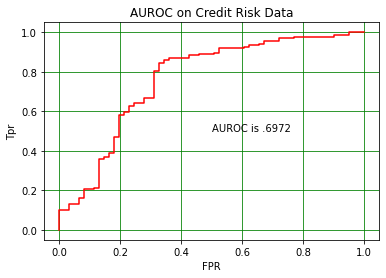

In [73]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color="r")
plt.grid(color="g")
plt.title('AUROC on Credit Risk Data')
plt.xlabel('FPR')
plt.ylabel('Tpr')
plt.text(x=.5,y=.5,s='AUROC is .6972')

In [ ]:
#practice on churn
#titanic